## A new notebook for analysis of some files from kaggle: analysis of data scientists, where they are likley to work, what governs those factors and what makes them switch positions

In [1]:
# Importing relevant libraries

import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
import os

In [2]:
from os.path import isfile, join
mypath = 'kaggle_data_science/'
files = [f for f in os.listdir(mypath) if isfile(join(mypath,f))]

# Loading the files
data = pd.read_csv(mypath + files[1])
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


### Definitely need to clean up the data as there are some Nan's in company size, gender, company type

In [3]:
# Some info about the dataset 
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### There are a total of 19518 entries. The first thing we can do is to look for differences between people that are looking for a job change vs. those that are not. So we can separate the data based on the target = 0 or 1

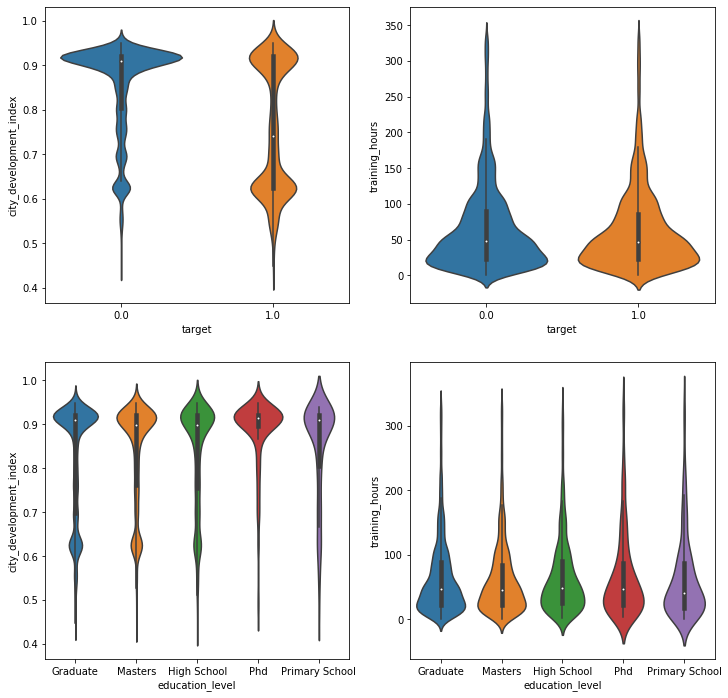

In [4]:

fig, axs = plt.subplots(2,2,figsize=(12,12))
sns.violinplot(x = 'target', y = 'city_development_index', data = data, ax = axs[0,0])
sns.violinplot(x = 'target', y = 'training_hours', data = data, ax = axs[0,1] )
sns.violinplot(x = 'education_level', y = 'city_development_index', data = data, ax = axs[1,0])
sns.violinplot(x = 'education_level', y = 'training_hours', data = data, ax = axs[1,1])
plt.show()

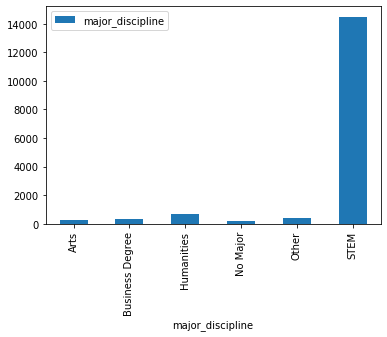

In [5]:
data.groupby('major_discipline')[['major_discipline']].count().plot.bar()

### Most of the data scientists have STEM degrees

### Question 1: Which city has the most STEM candidates ?

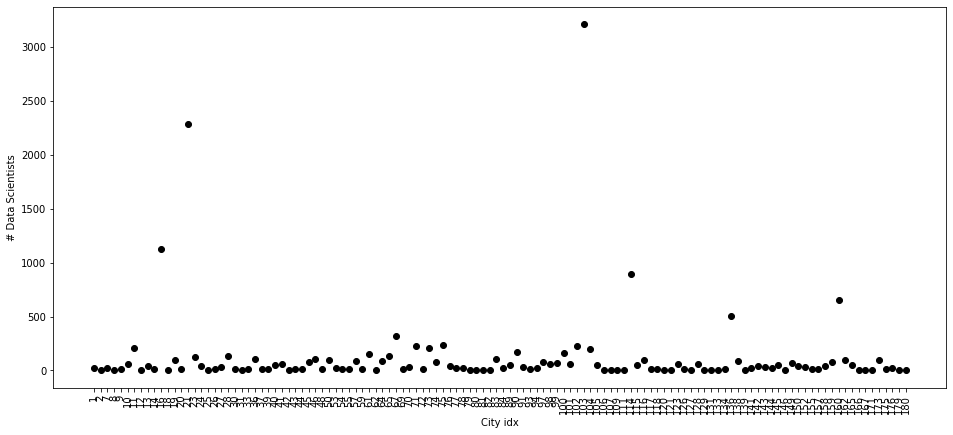

In [6]:
disciplines = [f for f, df in data.groupby('major_discipline')['city']]
STEM_degrees = [df for f, df in data.groupby('major_discipline')['city'] if f == 'STEM']
STEM_data = data[data['major_discipline']=='STEM']

cities = []
num_in_cities = []
for ii in STEM_data['city'].unique():
    x = str(ii)
    cities.append(x.split('_')[1])
    num_in_cities.append(STEM_data[STEM_data['city']==ii]['major_discipline'].count())

# Some more processing to order the x-axis in ascending number of cities 
tmp = np.zeros((len(cities)))
for i, c in enumerate(cities):
    tmp[i] = int(c)
idx = np.argsort(tmp)
tmp = np.sort(tmp)
cities = [str(c).split('.')[0] for c in tmp]
num_in_cities = [num_in_cities[c] for c in idx]
    
plt.figure(figsize=(16,7))
plt.plot(np.asarray(cities),np.asarray(num_in_cities),'o', color = 'black')
plt.xlabel('City idx')
plt.ylabel('# Data Scientists')
plt.xticks(rotation=90)
plt.show()

### City 103 has the highest number of STEM candidates

### Question 2: What is the education level of the STEM people?

Text(0, 0.5, '# Data Scientists')

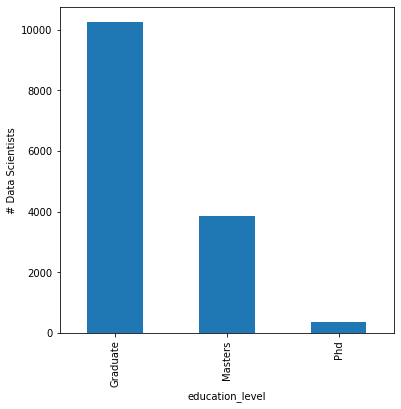

In [7]:
%matplotlib inline
plt.figure(figsize=(6,6))
ax = STEM_data.groupby('education_level')['education_level'].count().plot(kind='bar')
ax.set_ylabel('# Data Scientists')

### Most of the data scientists in STEM just have a graduate degree. Clearly PhD is not required to become a data scientist

### Question 3: How many years of experince do Data scientists have and do data-scientists with more experience are less likely to look for jobs?

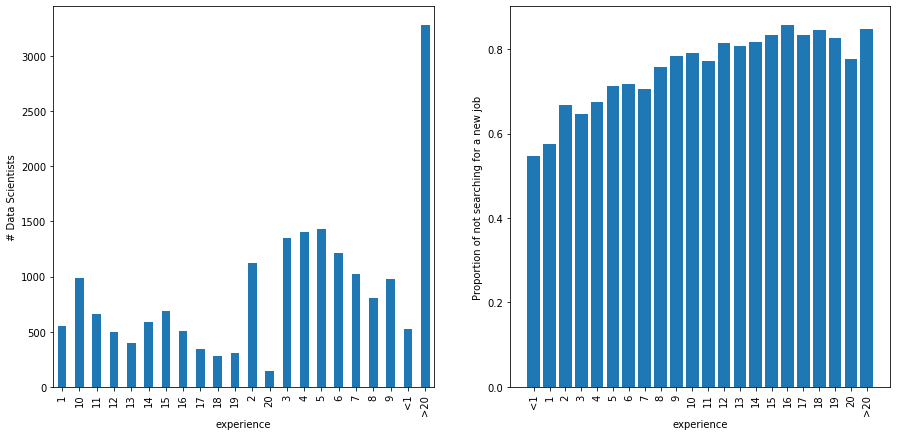

In [8]:
tmp = [f for f,df in data.groupby('experience')]
experience = np.zeros(len(tmp[0:-2]))
for i, c in enumerate(tmp[0:-2]):
    experience[i] = int(c)
experience = np.sort(experience)
experience = list(experience)
experience = [str(e).split('.')[0] for e in experience]
experience.insert(0,tmp[-2])
experience.append(tmp[-1])

proportion_of_search = []
for ii in experience:
    x = (data[data['experience']==ii]['target']==0)
    proportion_of_search.append(sum(x)/len(x))
    

fig, ax = plt.subplots(1,2, figsize=(15,7))
t = data.groupby('experience')['experience'].count().plot(kind='bar', ax=ax[0])
t.set_ylabel('# Data Scientists')
ax[1].bar(experience,np.asarray(proportion_of_search))
plt.xticks(experience,rotation='vertical')
plt.xlabel('experience')
plt.ylabel('Proportion of not searching for a new job')
plt.show()

### Most data scientists have 20+ years of experience and people with 1-5 years of job experience tend to switch jobs more than people with 5+ years of job experience. Data Scientists with less than 1 yr of job experience are the most likely to change their jobs. So my impression is that people want to get experience in their first job and once they have built their credentials, they switch jobs to suit their interests in the realm of data science

### Question 4: How does company type and company size play role for data scientists? Or what combination of company type and company size attact data scientists?

[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']


Text(0, 0.5, '# Data Scientists')

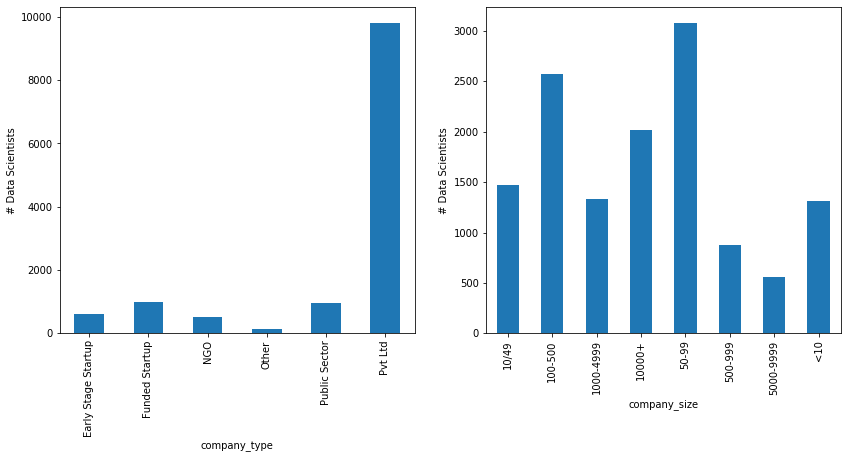

In [9]:
company_type = [f for f, df in data.groupby('company_type')['company_type']]
company_size = [f for f, df in data.groupby('company_size')['company_size']]
print(company_type)
print(company_size)

f, ax = plt.subplots(1,2,figsize=(14,6))
t1 = data.groupby('company_type')['company_type'].count().plot(kind='bar', ax= ax[0])
t1.set_ylabel('# Data Scientists')
t2 = data.groupby('company_size')['company_size'].count().plot(kind='bar', ax= ax[1])
t2.set_ylabel('# Data Scientists')

### Most data scientists work in Pvt Ltd and/or with a company size of 50-99 employees. But still I want to see a plot that shows me the joint distribution and not the marginal distribution

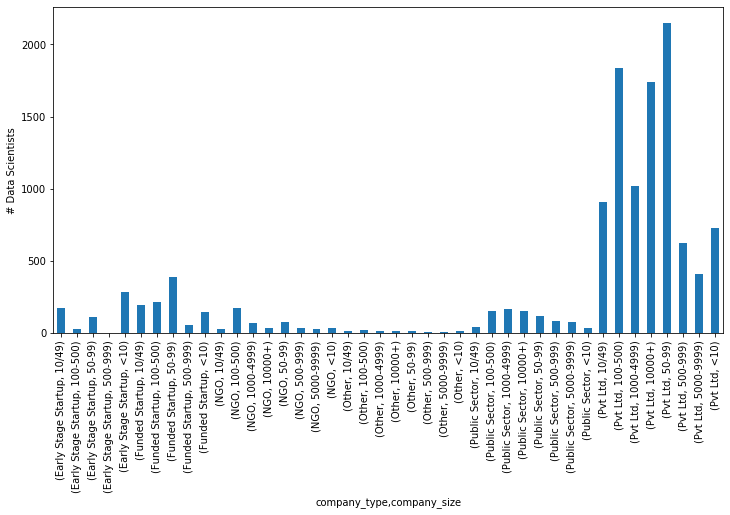

In [36]:
plt.figure(figsize=(12,6))
t1 = data.groupby(['company_type', 'company_size']).size().plot(kind='bar')
t1.set_ylabel('# Data Scientists')
plt.show()

### A lot of data scientists are present in the Pvt. Ltd with an employee size of 50-99. This result is consistent with the analysis of the marginal distribution 

### Now, I want to check for which of those combinations do the employees switch job

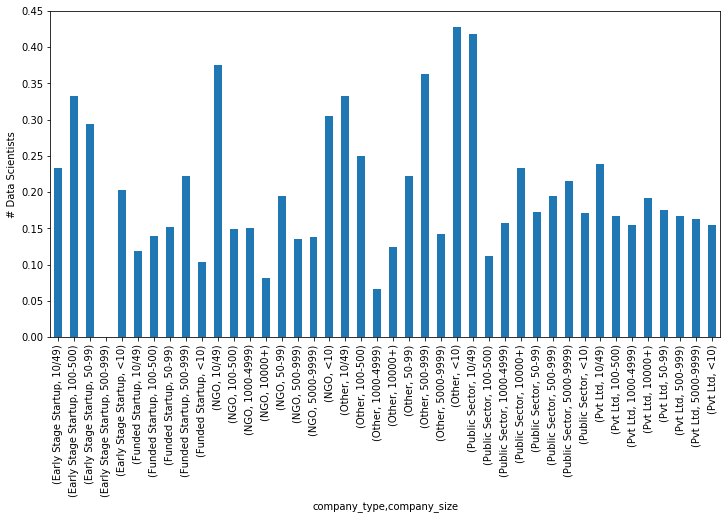

In [44]:
target_data = data.groupby(['company_type', 'company_size'])['target']
proportion_of_jobchange = target_data.sum()/target_data.count()

plt.figure(figsize=(12,6))
t2 = proportion_of_jobchange.plot(kind='bar')
t2.set_ylabel('# Data Scientists')
plt.show()

### Data scientists working in "Other industries" with < 10 employees are more likely to switch jobs.

### Question 5: What is the distribution of genders according to degree, experience and are females change jobs more frequently than males ?